# Employee Churn — SQL → pandas → Logistic Regression

## Employee Churn — SQL → pandas → Logistic Regression:

**Pipeline:**

Read from SQLite (data/hr.db)

Feature prep (numeric + one-hot categorical)

Train/test split & logistic regression (sklearn)

Quick metrics + coefficient plot

In [1]:
import os, sqlite3, sys
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression

print("Python:", sys.version.split()[0])
os.makedirs("../figures", exist_ok=True)
plt.rcParams.update({"figure.figsize": (5,4), "axes.grid": True, "axes.spines.top": False, "axes.spines.right": False})

DB_PATH = "../data/hr.db"  # from notebooks/ to data/
assert os.path.exists(DB_PATH), "Expected ../data/hr.db to exist"


Python: 3.13.7


## Peek at the SQL table:

In [4]:
con = sqlite3.connect(DB_PATH)
df = pd.read_sql_query("SELECT * FROM employees", con)
con.close()

df


,employee_id,age,dept,years_at_company,monthly_income,over_time,left_company
0,1,29,Sales,3.0,4200.0,1,0
1,2,41,Engineering,8.0,9800.0,0,0
2,3,35,Support,2.0,3500.0,1,1
3,4,50,Engineering,20.0,14200.0,0,0
4,5,26,Sales,1.0,3100.0,1,1
5,6,32,HR,4.0,5200.0,0,0
6,7,38,Support,6.0,6100.0,1,1
7,8,45,Engineering,9.0,9900.0,0,0


**Feature engineering**

Numeric: age, years_at_company, monthly_income

Binary (already 0/1): over_time

Categorical (one-hot): dept

Target: left_company (0/1)

In [7]:
num_cols = ["age", "years_at_company", "monthly_income"]
bin_cols = ["over_time"]
cat_cols = ["dept"]
target = "left_company"

X = df[num_cols + bin_cols + cat_cols]
y = df[target].values

# One-hot encode dept
X = pd.get_dummies(X, columns=cat_cols, drop_first=True)

# Train/test split
X_train, X_test, y_train, y_test = train_test_split(X.values, y, test_size=0.35, random_state=42, stratify=y)

# Scale numeric features (only numerics by index slice)
num_idx = [X.columns.get_loc(c) for c in num_cols]
scaler = StandardScaler()
X_train_scaled = X_train.copy().astype(float)
X_test_scaled  = X_test.copy().astype(float)

X_train_scaled[:, num_idx] = scaler.fit_transform(X_train[:, num_idx])
X_test_scaled[:,  num_idx] = scaler.transform(X_test[:,  num_idx])

# Train logistic regression
clf = LogisticRegression(max_iter=1000)
clf.fit(X_train_scaled, y_train)

acc = clf.score(X_test_scaled, y_test)
print(f"Test accuracy: {acc:.3f}")


Test accuracy: 0.333


## Coefficients (feature importance-ish)

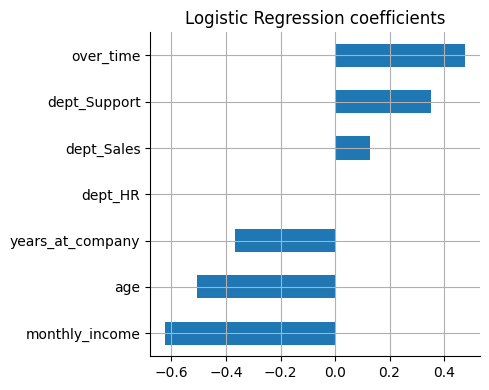

<Figure size 500x400 with 0 Axes>

In [9]:
coefs = pd.Series(clf.coef_.ravel(), index=X.columns)
coefs.sort_values().plot(kind="barh")
plt.title("Logistic Regression coefficients")
plt.tight_layout()
plt.show()

plt.gcf().savefig("../figures/day2_churn_coeffs.png", dpi=150, bbox_inches="tight")


In [8]:
import sqlite3, pandas as pd
# TODO: connect to data/hr.db and explore